# 03-123 : Heatmap Model

Create the model definition using the heatmap feature. This model will be later used when training by question.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mlflow

import keras as k
from keras import optimizers
import keras_tuner

from competition.models.heatmap_covnet import HeatmapCovnetModel

In [3]:
# define the tuner parameters
def define_tune_parameters(hp):
    hp.Int('covnet_block_count', min_value=1, max_value=3, step=1)
    hp.Choice('covnet_activation', values=['relu', 'tanh', 'LeakyReLU'])
    hp.Int('covnet_cov_count', min_value=1, max_value=3, step=1)
    hp.Int('covnet_channels', min_value=32, max_value=64, step=16)
    hp.Choice('covnet_kernel_size', values=['(3, 3)'])
    hp.Choice('covnet_pool_size', values=['(2, 2)'])

    hp.Int('dense_layer_count', min_value=1, max_value=20, step=1)
    hp.Int('dense_units', min_value=640, max_value=1700, step=32)
    hp.Choice('dense_activation', values=['relu', 'tanh', 'LeakyReLU'])
    hp.Float('dense_l1_regularization', min_value=0.0, max_value=0.0005, step=0.00001)
    hp.Float('dense_l2_regularization', min_value=0.0, max_value=0.001, step=0.0001)
    hp.Float('dense_dropout', min_value=0.005, max_value=0.1, step=0.005)
    hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])

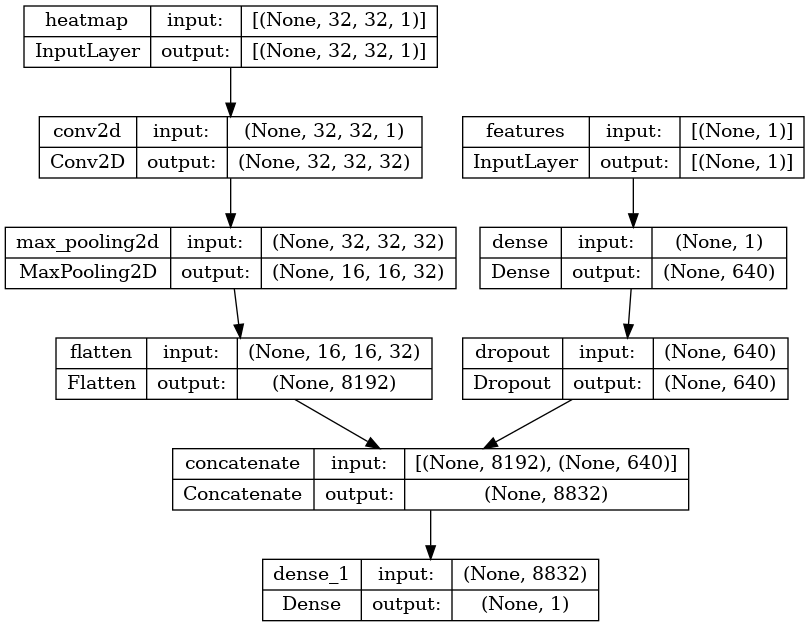

In [4]:
mlflow.end_run()

heatmap_model = HeatmapCovnetModel(
    input_shape=1,
    heatmap_shape=(32, 32, 1),
    output_shape=1,
    loss='mse',
    metrics=['mae'])

hp = keras_tuner.HyperParameters()
model = heatmap_model.get_model_wrapper(
    hp,
    define_tune_parameters,
    optimizer=optimizers.Adam)

k.utils.plot_model(model, show_shapes=True)
    